# PhishGuard: A Multi-Layered Ensemble Model for Optimal Phishing Website Detection

## Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Load the data

In [2]:
file_path = 'PhishingData.csv'
phishing_data = pd.read_csv(file_path)

In [3]:
phishing_data.shape

(11055, 32)

In [4]:
# Display the first few rows of the dataset for an overview
phishing_data.head()

index   having_IPhaving_IP_Address   URLURL_Length   Shortining_Service   \
0       1                           -1               1                    1   
1       2                            1               1                    1   
2       3                            1               0                    1   
3       4                            1               0                    1   
4       5                            1               0                   -1   

   having_At_Symbol   double_slash_redirecting   Prefix_Suffix   \
0                  1                         -1              -1   
1                  1                          1              -1   
2                  1                          1              -1   
3                  1                          1              -1   
4                  1                          1              -1   

   having_Sub_Domain   SSLfinal_State   Domain_registeration_length   ...  \
0                  -1               -1                            -1  ...   
1                   0                1                            -1  ...   
2                  -1               -1                            -1  ...   
3                  -1               -1                             1  ...   
4                   1                1                            -1  ...   

   popUpWidnow   Iframe   age_of_domain   DNSRecord   web_traffic   \
0             1        1              -1          -1            -1   
1             1        1              -1          -1             0   
2             1        1               1          -1             1   
3             1        1              -1          -1             1   
4            -1        1              -1          -1             0   

   Page_Rank   Google_Index   Links_pointing_to_page   Statistical_report   \
0          -1              1                        1                   -1   
1          -1              1                        1                    1   
2          -1              1                        0                   -1   
3          -1              1                       -1                    1   
4          -1              1                        1                    1   

   Result  
0      -1  
1      -1  
2      -1  
3      -1  
4       1  

[5 rows x 32 columns]

In [5]:
# Name of columns
list(phishing_data.columns)

['index ',
 'having_IPhaving_IP_Address ',
 'URLURL_Length ',
 'Shortining_Service ',
 'having_At_Symbol ',
 'double_slash_redirecting ',
 'Prefix_Suffix ',
 'having_Sub_Domain ',
 'SSLfinal_State ',
 'Domain_registeration_length ',
 'Favicon ',
 'port ',
 'HTTPS_token ',
 'Request_URL ',
 'URL_of_Anchor ',
 'Links_in_tags ',
 'SFH ',
 'Submitting_to_email ',
 'Abnormal_URL ',
 'Redirect ',
 'on_mouseover ',
 'RightClick ',
 'popUpWidnow ',
 'Iframe ',
 'age_of_domain ',
 'DNSRecord ',
 'web_traffic ',
 'Page_Rank ',
 'Google_Index ',
 'Links_pointing_to_page ',
 'Statistical_report ',
 'Result']

In [6]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   index                         11055 non-null  int64
 1   having_IPhaving_IP_Address    11055 non-null  int64
 2   URLURL_Length                 11055 non-null  int64
 3   Shortining_Service            11055 non-null  int64
 4   having_At_Symbol              11055 non-null  int64
 5   double_slash_redirecting      11055 non-null  int64
 6   Prefix_Suffix                 11055 non-null  int64
 7   having_Sub_Domain             11055 non-null  int64
 8   SSLfinal_State                11055 non-null  int64
 9   Domain_registeration_length   11055 non-null  int64
 10  Favicon                       11055 non-null  int64
 11  port                          11055 non-null  int64
 12  HTTPS_token                   11055 non-null  int64
 13  Request_URL                   1

In [7]:
# We can see that there are no missing values in the Dataset
for col in phishing_data.columns:
    unique_value_list = phishing_data[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {phishing_data[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index  has 11055 unique values
having_IPhaving_IP_Address  contains:			[-1  1]
URLURL_Length  contains:			[ 1  0 -1]
Shortining_Service  contains:			[ 1 -1]
having_At_Symbol  contains:			[ 1 -1]
double_slash_redirecting  contains:			[-1  1]
Prefix_Suffix  contains:			[-1  1]
having_Sub_Domain  contains:			[-1  0  1]
SSLfinal_State  contains:			[-1  1  0]
Domain_registeration_length  contains:			[-1  1]
Favicon  contains:			[ 1 -1]
port  contains:			[ 1 -1]
HTTPS_token  contains:			[-1  1]
Request_URL  contains:			[ 1 -1]
URL_of_Anchor  contains:			[-1  0  1]
Links_in_tags  contains:			[ 1 -1  0]
SFH  contains:			[-1  1  0]
Submitting_to_email  contains:			[-1  1]
Abnormal_URL  contains:			[-1  1]
Redirect  contains:			[0 1]
on_mouseover  contains:			[ 1 -1]
RightClick  contains:			[ 1 -1]
popUpWidnow  contains:			[ 1 -1]
Iframe  contains:			[ 1 -1]
age_of_domain  contains:			[-1  1]
DNSRecord  contains:			[-1  1]
web_traffic  contains:			[-1  0  1]
Page_Rank  contains:			[-1  1]
Google

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [8]:
#Replacing -1 with 0 
phishing_data['Result']=phishing_data['Result'].replace(-1,0)

In [9]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling
phishing_data = phishing_data.drop(phishing_data.columns[0],axis=1)
phishing_data

having_IPhaving_IP_Address   URLURL_Length   Shortining_Service   \
0                               -1               1                    1   
1                                1               1                    1   
2                                1               0                    1   
3                                1               0                    1   
4                                1               0                   -1   
...                            ...             ...                  ...   
11050                            1              -1                    1   
11051                           -1               1                    1   
11052                            1              -1                    1   
11053                           -1              -1                    1   
11054                           -1              -1                    1   

       having_At_Symbol   double_slash_redirecting   Prefix_Suffix   \
0                      1                         -1              -1   
1                      1                          1              -1   
2                      1                          1              -1   
3                      1                          1              -1   
4                      1                          1              -1   
...                  ...                        ...             ...   
11050                 -1                          1               1   
11051                 -1                         -1              -1   
11052                  1                          1              -1   
11053                  1                          1              -1   
11054                  1                          1              -1   

       having_Sub_Domain   SSLfinal_State   Domain_registeration_length   \
0                      -1               -1                            -1   
1                       0                1                            -1   
2                      -1               -1                            -1   
3                      -1               -1                             1   
4                       1                1                            -1   
...                   ...              ...                           ...   
11050                   1                1                            -1   
11051                   1               -1                            -1   
11052                   1               -1                            -1   
11053                  -1               -1                             1   
11054                  -1               -1                             1   

       Favicon   ...  popUpWidnow   Iframe   age_of_domain   DNSRecord   \
0             1  ...             1        1              -1          -1   
1             1  ...             1        1              -1          -1   
2             1  ...             1        1               1          -1   
3             1  ...             1        1              -1          -1   
4             1  ...            -1        1              -1          -1   
...         ...  ...           ...      ...             ...         ...   
11050        -1  ...            -1       -1               1           1   
11051        -1  ...            -1        1               1           1   
11052         1  ...             1        1               1           1   
11053        -1  ...            -1        1               1           1   
11054         1  ...             1        1              -1           1   

       web_traffic   Page_Rank   Google_Index   Links_pointing_to_page   \
0                -1          -1              1                        1   
1                 0          -1              1                        1   
2                 1          -1              1                        0   
3                 1          -1              1                       -1   
4                 0          -1              1                  

### Distribution of Phishing and Legitimate Sites in Dataset

Result
1    6157
0    4898
Name: count, dtype: int64


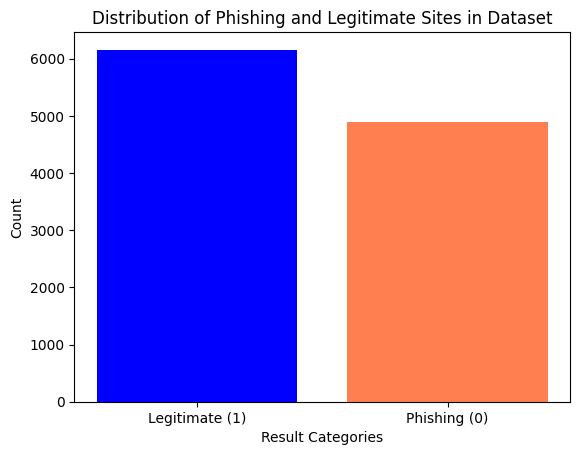

In [10]:
# Count the occurrences of each category in the 'Result' column
result_counts = phishing_data['Result'].value_counts()
print(phishing_data['Result'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (1)','Phishing (0)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

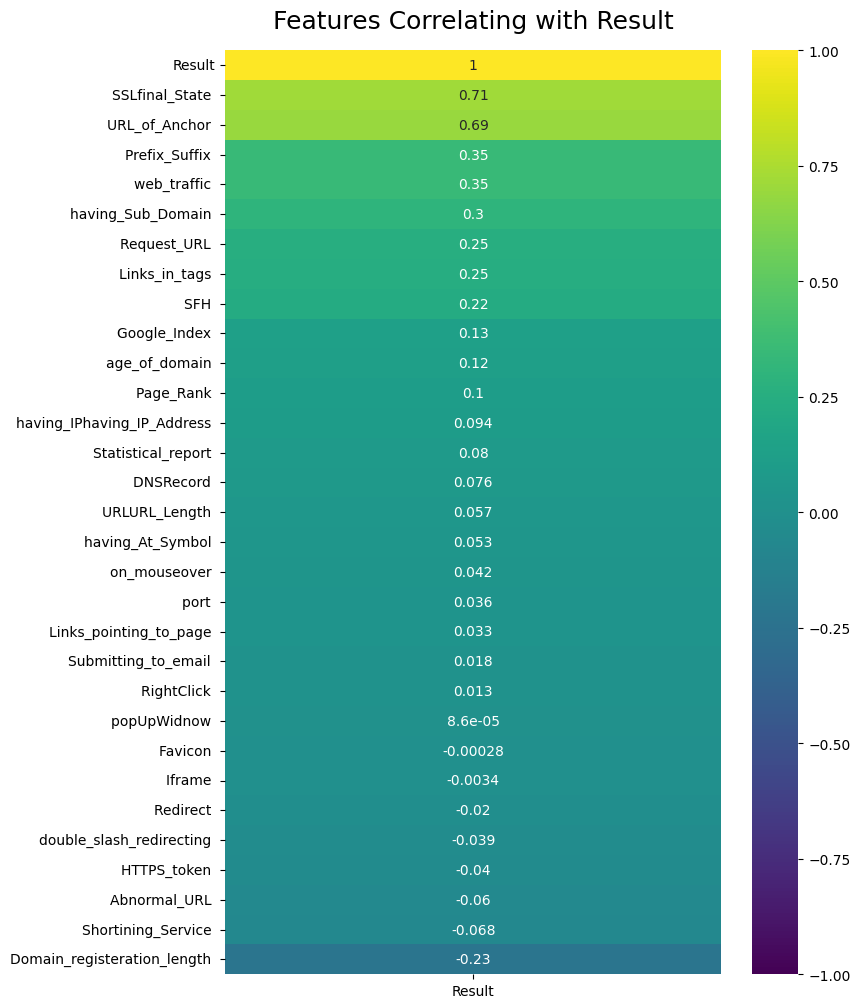

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(phishing_data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [12]:
# Print correlation with target variable
print(phishing_data.corr()['Result'].sort_values())   

Domain_registeration_length    -0.225789
Shortining_Service             -0.067966
Abnormal_URL                   -0.060488
HTTPS_token                    -0.039854
double_slash_redirecting       -0.038608
Redirect                       -0.020113
Iframe                         -0.003394
Favicon                        -0.000280
popUpWidnow                     0.000086
RightClick                      0.012653
Submitting_to_email             0.018249
Links_pointing_to_page          0.032574
port                            0.036419
on_mouseover                    0.041838
having_At_Symbol                0.052948
URLURL_Length                   0.057430
DNSRecord                       0.075718
Statistical_report              0.079857
having_IPhaving_IP_Address      0.094160
Page_Rank                       0.104645
age_of_domain                   0.121496
Google_Index                    0.128950
SFH                             0.221419
Links_in_tags                   0.248229
Request_URL     

In [13]:
# Based on the provided correlation output, let's filter out the features with a correlation less than 0
# and keep one feature from those whose correlation values are between the 2nd and 3rd highest.

# First, we get the features with correlation less than 0 removed
positive_corr_features = phishing_data.columns[phishing_data.corr()['Result'] > 0]

# Create a new DataFrame with only the features to keep
filtered_phishing_data = phishing_data[positive_corr_features]

# Display the first few rows of the filtered DataFrame to verify
filtered_phishing_data.head()


having_IPhaving_IP_Address   URLURL_Length   having_At_Symbol   \
0                           -1               1                  1   
1                            1               1                  1   
2                            1               0                  1   
3                            1               0                  1   
4                            1               0                  1   

   Prefix_Suffix   having_Sub_Domain   SSLfinal_State   port   Request_URL   \
0              -1                  -1               -1      1             1   
1              -1                   0                1      1             1   
2              -1                  -1               -1      1             1   
3              -1                  -1               -1      1            -1   
4              -1                   1                1      1             1   

   URL_of_Anchor   Links_in_tags   ...  RightClick   popUpWidnow   \
0              -1               1  ...            1             1   
1               0              -1  ...            1             1   
2               0              -1  ...            1             1   
3               0               0  ...            1             1   
4               0               0  ...            1            -1   

   age_of_domain   DNSRecord   web_traffic   Page_Rank   Google_Index   \
0              -1          -1            -1          -1              1   
1              -1          -1             0          -1              1   
2               1          -1             1          -1              1   
3              -1          -1             1          -1              1   
4              -1          -1             0          -1              1   

   Links_pointing_to_page   Statistical_report   Result  
0                        1                   -1       0  
1                        1                    1       0  
2                        0                   -1       0  
3                       -1                    1       0  
4                        1                    1       1  

[5 rows x 23 columns]

In [14]:
# Print correlation with target variable
print(filtered_phishing_data.corr()['Result'].sort_values())  

popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372
having_Sub_Domain              0.298323
web_traffic                    0.346103
Prefix_Suffix                  0.348606
URL_of_Anchor                  0.692935
SSLfinal_State                 0.714741
Result                         1.000000
Name: Result, dtype: float64


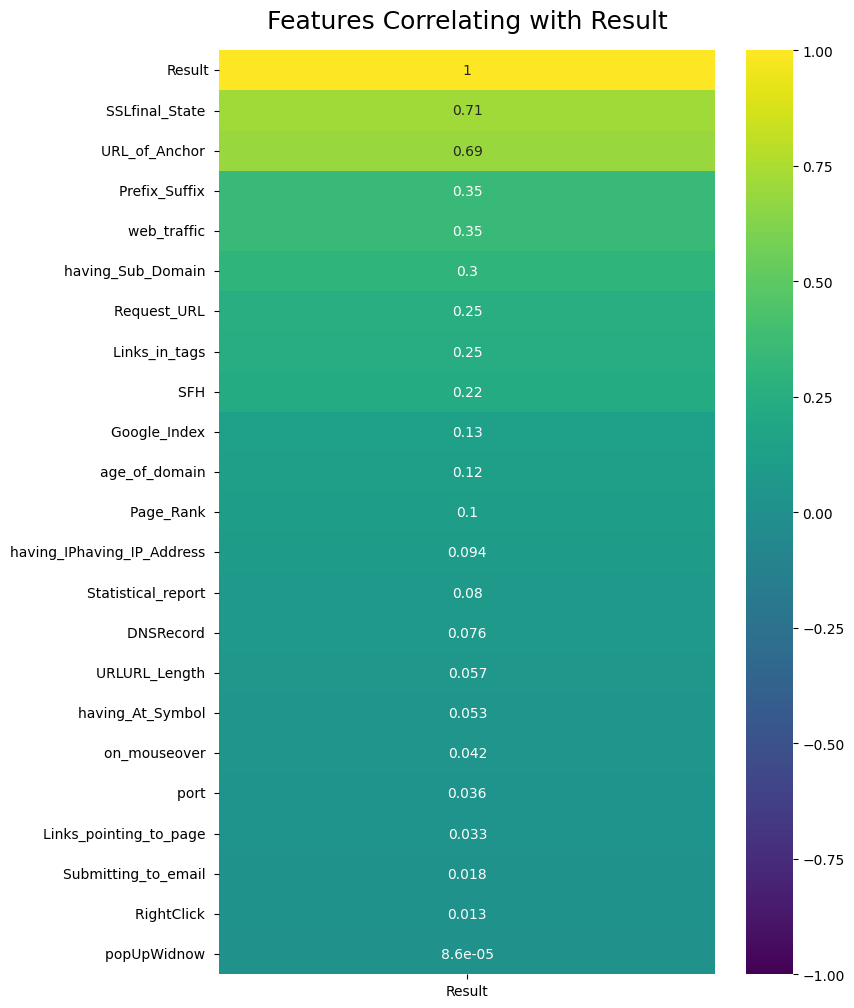

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(filtered_phishing_data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

# MODELS

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from time import perf_counter

In [17]:
def binary_classification_accuracy(actual, pred):
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    
target = filtered_phishing_data['Result']
features = filtered_phishing_data.drop(columns=['Result'])

# Define the number of splits for KFold
n_splits = 10 
folds = KFold(n_splits=n_splits, shuffle=True, random_state = 2)

# MODEL 01: SVM

In [18]:
accuracy_scores_svm = []
duration_svm =[]

features_array = features.values
target_array = target.values

for fold, (train_idx, validation_idx) in enumerate(folds.split(features_array, target_array)):
    start = perf_counter()
    model = SVC(kernel='rbf', C=1000, gamma=0.001)
    model.fit(features_array[train_idx], target_array[train_idx])
    predicted_values = model.predict(features_array[validation_idx])
    
    accuracy = accuracy_score(target[validation_idx], predicted_values)
    accuracy_scores_svm.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    print(f'Accuracy score: {accuracy}')
    
    duration = perf_counter() - start
    duration_svm.append(duration)


==== FOLD 1 ====
Accuracy score: 0.9358047016274864
==== FOLD 2 ====
Accuracy score: 0.9475587703435805
==== FOLD 3 ====
Accuracy score: 0.9439421338155516
==== FOLD 4 ====
Accuracy score: 0.9358047016274864
==== FOLD 5 ====
Accuracy score: 0.9394213381555153
==== FOLD 6 ====
Accuracy score: 0.9520361990950226
==== FOLD 7 ====
Accuracy score: 0.934841628959276
==== FOLD 8 ====
Accuracy score: 0.9556561085972851
==== FOLD 9 ====
Accuracy score: 0.9402714932126697
==== FOLD 10 ====
Accuracy score: 0.9429864253393665


In [19]:
accuracy_scores_svm

[0.9358047016274864,
 0.9475587703435805,
 0.9439421338155516,
 0.9358047016274864,
 0.9394213381555153,
 0.9520361990950226,
 0.934841628959276,
 0.9556561085972851,
 0.9402714932126697,
 0.9429864253393665]

In [20]:
duration_svm

[0.7765635830000974,
 0.8422010419890285,
 0.7941266249981709,
 0.8109404999995604,
 0.7573882089927793,
 0.7700922499934677,
 0.7652620830049273,
 0.8871380829950795,
 0.793637166992994,
 0.8184776659763884]

# MODEL 02: RANDOM FORREST

In [21]:
accuracy_scores_rf = []
duration_rf =[]

features_array = features.values
target_array = target.values

# Rest of the code for KFold cross-validation remains the same
for fold, (train_idx, validation_idx) in enumerate(folds.split(features_array, target_array)):
    start = perf_counter()
    model = RandomForestClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=2,min_samples_split=5,n_estimators=100, random_state=2)
    model.fit(features_array[train_idx], target_array[train_idx])
    predicted_values = model.predict(features_array[validation_idx])
    
    # Calculate the accuracy score for this fold
    accuracy = accuracy_score(target[validation_idx], predicted_values)
    accuracy_scores_rf.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    print(f'Accuracy score: {accuracy}')

    duration = perf_counter() - start
    duration_rf.append(duration)


==== FOLD 1 ====
Accuracy score: 0.9547920433996383
==== FOLD 2 ====
Accuracy score: 0.9719710669077758
==== FOLD 3 ====
Accuracy score: 0.9638336347197106
==== FOLD 4 ====
Accuracy score: 0.9584086799276673
==== FOLD 5 ====
Accuracy score: 0.9701627486437613
==== FOLD 6 ====
Accuracy score: 0.9701357466063348
==== FOLD 7 ====
Accuracy score: 0.9638009049773756
==== FOLD 8 ====
Accuracy score: 0.9619909502262444
==== FOLD 9 ====
Accuracy score: 0.9656108597285068
==== FOLD 10 ====
Accuracy score: 0.9638009049773756


In [22]:
accuracy_scores_rf

[0.9547920433996383,
 0.9719710669077758,
 0.9638336347197106,
 0.9584086799276673,
 0.9701627486437613,
 0.9701357466063348,
 0.9638009049773756,
 0.9619909502262444,
 0.9656108597285068,
 0.9638009049773756]

In [23]:
duration_rf

[0.30052525000064634,
 0.5179175829980522,
 0.26278541699866764,
 0.26564845797838643,
 0.2555629159905948,
 0.25127904198598117,
 0.2660965840041172,
 0.26156445799279027,
 0.24857341701863334,
 0.2495443750231061]

# MODEL 03: XGBOOST

In [24]:
accuracy_scores_xgb = []
duration_xgb =[]

for fold, (train_idx, validation_idx) in enumerate(folds.split(features, target)):
    start = perf_counter()
    model = XGBClassifier()
    model.fit(np.array(features)[train_idx,:], np.array(target)[train_idx])
    predicted_values = model.predict(np.array(features)[validation_idx,:])
    
    # calculate the accuracy score for this fold
    accuracy = accuracy_score(np.array(target)[validation_idx], predicted_values)
    accuracy_scores_xgb.append(accuracy)

    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.array(target)[validation_idx], predicted_values)
    duration = perf_counter() - start
    duration_xgb.append(duration)



==== FOLD 1 ====
Accuracy score: 
0.9665461121157324
==== FOLD 2 ====
Accuracy score: 
0.9737793851717902
==== FOLD 3 ====
Accuracy score: 
0.9773960216998192
==== FOLD 4 ====
Accuracy score: 
0.9602169981916817
==== FOLD 5 ====
Accuracy score: 
0.976491862567812
==== FOLD 6 ====
Accuracy score: 
0.9692307692307692
==== FOLD 7 ====
Accuracy score: 
0.9647058823529412
==== FOLD 8 ====
Accuracy score: 
0.971945701357466
==== FOLD 9 ====
Accuracy score: 
0.9728506787330317
==== FOLD 10 ====
Accuracy score: 
0.9601809954751132


In [25]:
accuracy_scores_xgb

[0.9665461121157324,
 0.9737793851717902,
 0.9773960216998192,
 0.9602169981916817,
 0.976491862567812,
 0.9692307692307692,
 0.9647058823529412,
 0.971945701357466,
 0.9728506787330317,
 0.9601809954751132]

In [26]:
duration_xgb

[0.13153487499221228,
 0.06759116699686274,
 0.0650014580169227,
 0.0837726249883417,
 0.06158195898751728,
 0.06649641701369546,
 0.10267862500040792,
 0.07444300001952797,
 0.06789899998693727,
 0.08874054200714454]

## Accuracy of three models together

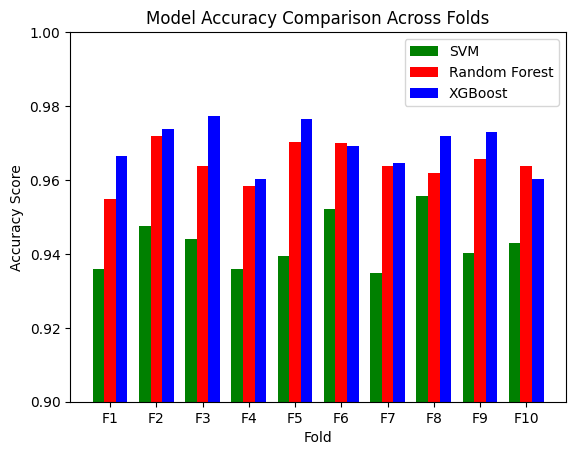

In [27]:
# Number of folds
n_folds = len(accuracy_scores_xgb)

# Creating x locations for the groups on the x-axis
fold_indices = np.arange(n_folds)

# Width of the bars
bar_width = 0.25

# Create a bar plot to display the accuracy scores for each fold
fig, ax = plt.subplots()

# Plotting each model's accuracy scores
ax.bar(fold_indices - bar_width, accuracy_scores_svm, bar_width, label='SVM', color='green')
ax.bar(fold_indices, accuracy_scores_rf, bar_width, label='Random Forest', color='red')
ax.bar(fold_indices + bar_width, accuracy_scores_xgb, bar_width, label='XGBoost', color='blue')

# Adding labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy Comparison Across Folds')
ax.set_xticks(fold_indices)
ax.set_xticklabels([f'F{i+1}' for i in range(n_folds)])
ax.legend()
# Setting y-axis limits to show accuracy from 0.5 to 1
ax.set_ylim(0.9, 1)
# Display the plot
plt.show()



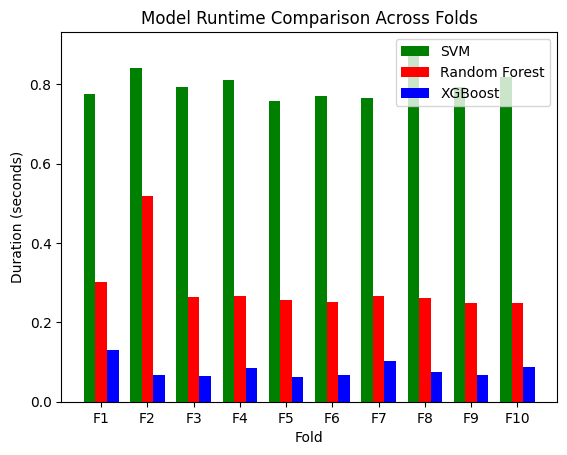

In [28]:
# Number of folds
n_folds = len(duration_svm) 

# Creating x locations for the groups on the x-axis
fold_indices = np.arange(n_folds)

# Width of the bars
bar_width = 0.25

# Create a bar plot to display the duration scores for each fold
fig, ax = plt.subplots()

# Plotting each model's duration scores
ax.bar(fold_indices - bar_width, duration_svm, bar_width, label='SVM', color='green')
ax.bar(fold_indices, duration_rf, bar_width, label='Random Forest', color='red')
ax.bar(fold_indices + bar_width, duration_xgb, bar_width, label='XGBoost', color='blue')

# Adding labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Model Runtime Comparison Across Folds')
ax.set_xticks(fold_indices)
ax.set_xticklabels([f'F{i+1}' for i in range(n_folds)])
ax.legend()

# Display the plot
plt.show()


---

# Anova

F-Statistic: 17.427623345595222, P-Value: 1.3798360323204663e-05
The differences between the models are statistically significant.
Confidence Interval for Algorithm A: (0.8354771102488585, 0.9925228897511416)
Confidence Interval for Algorithm B: (0.723623673361436, 0.8823763266385644)
Confidence Interval for Algorithm C: (0.6037323543987774, 0.7042676456012225)


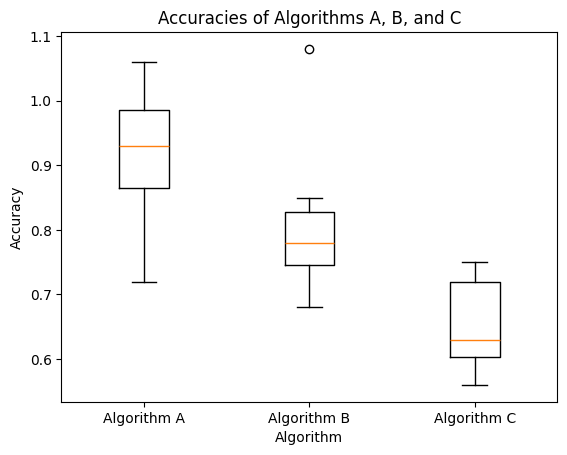

In [51]:
from scipy import stats
import numpy as np

# Accuracies from the provided document for each algorithm
accuracies_a = np.array([0.9, 0.97, 0.86, 0.72, 0.99, 1.06, 0.77, 1.03, 0.96, 0.88])
accuracies_b = np.array([0.71, 0.79, 0.85, 0.77, 0.74, 0.83, 1.08, 0.68, 0.82, 0.76])
accuracies_c = np.array([0.61, 0.59, 0.63, 0.6, 0.75, 0.73, 0.63, 0.56, 0.75, 0.69])

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(accuracies_a, accuracies_b, accuracies_c)
print(f'F-Statistic: {f_statistic}, P-Value: {p_value}')

# Check if the p-value is less than 0.05 to determine if the differences are statistically significant
if p_value < 0.05:
    print("The differences between the models are statistically significant.")
else:
    print("The differences between the models are not statistically significant.")

# Calculate confidence intervals for each model
def calculate_confidence_interval(data):
    mean = np.mean(data)
    std_error = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
    return confidence_interval

# Calculate and print confidence intervals for each model
ci_a = calculate_confidence_interval(accuracies_a)
ci_b = calculate_confidence_interval(accuracies_b)
ci_c = calculate_confidence_interval(accuracies_c)

print(f'Confidence Interval for Algorithm A: {ci_a}')
print(f'Confidence Interval for Algorithm B: {ci_b}')
print(f'Confidence Interval for Algorithm C: {ci_c}')

# Plotting the accuracies as a boxplot
plt.boxplot([accuracies_a, accuracies_b, accuracies_c], labels=['Algorithm A', 'Algorithm B', 'Algorithm C'])
plt.title('Accuracies of Algorithms A, B, and C')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.show()



In [52]:
# Print the means and effects
print(f'Mean for Algorithm A: {mean_a}')
print(f'Mean for Algorithm B: {mean_b}')
print(f'Mean for Algorithm C: {mean_c}')
print(f'Total Mean: {total_mean}')
print(f'Effect for Algorithm A: {effect_a}')
print(f'Effect for Algorithm B: {effect_b}')
print(f'Effect for Algorithm C: {effect_c}')

Mean for Algorithm A: 0.914
Mean for Algorithm B: 0.8030000000000002
Mean for Algorithm C: 0.6539999999999999
Total Mean: 0.7903333333333333
Effect for Algorithm A: 0.1236666666666667
Effect for Algorithm B: 0.012666666666666826
Effect for Algorithm C: -0.13633333333333342


In [55]:
from scipy import stats
import numpy as np

# Provided accuracies from the screenshots
accuracies_a = np.array([0.9, 0.97, 0.86, 0.72, 0.99, 1.06, 0.77, 1.03, 0.96, 0.88])
accuracies_b = np.array([0.71, 0.79, 0.85, 0.77, 0.74, 0.83, 1.08, 0.68, 0.82, 0.76])
accuracies_c = np.array([0.61, 0.59, 0.63, 0.6, 0.75, 0.73, 0.63, 0.56, 0.75, 0.69])

# Calculate the means for each algorithm
mean_a = np.mean(accuracies_a)
mean_b = np.mean(accuracies_b)
mean_c = np.mean(accuracies_c)

# Total mean across all algorithms
total_mean = np.mean([mean_a, mean_b, mean_c])

# Calculate effects for each algorithm
effect_a = mean_a - total_mean
effect_b = mean_b - total_mean
effect_c = mean_c - total_mean

# Number of algorithms and number of observations per algorithm
k = 3  # Number of algorithms
n = 10  # Number of observations per algorithm

# Sum of Squares for Error (SSE)
sse = 0.2637  # Provided Sum of Squares for Error

# Calculate the standard error for the contrast
se = np.sqrt(sse / (k * (n - 1)))

# Weights for each comparison (provided effects)
weights_ab = np.array([1, -1, 0])
weights_bc = np.array([0, 1, -1])
weights_ac = np.array([1, 0, -1])

# Calculate contrasts
contrast_ab = weights_ab[0] * effect_a + weights_ab[1] * effect_b
contrast_bc = weights_bc[1] * effect_b + weights_bc[2] * effect_c
contrast_ac = weights_ac[0] * effect_a + weights_ac[2] * effect_c

# Calculate contrast standard errors
sc_ab = np.sqrt((weights_ab[0]**2 + weights_ab[1]**2) * se**2 / n)
sc_bc = np.sqrt((weights_bc[1]**2 + weights_bc[2]**2) * se**2 / n)
sc_ac = np.sqrt((weights_ac[0]**2 + weights_ac[2]**2) * se**2 / n)

# Critical t-value for alpha = 0.01 with 27 degrees of freedom (two-tailed)
t_critical = stats.t.ppf(1 - 0.01/2, df=k*(n-1))

# Calculate confidence intervals for each contrast
ci_ab = (contrast_ab - t_critical * sc_ab, contrast_ab + t_critical * sc_ab)
ci_bc = (contrast_bc - t_critical * sc_bc, contrast_bc + t_critical * sc_bc)
ci_ac = (contrast_ac - t_critical * sc_ac, contrast_ac + t_critical * sc_ac)

# Print the results
print(f'Mean for Algorithm A: {mean_a}')
print(f'Mean for Algorithm B: {mean_b}')
print(f'Mean for Algorithm C: {mean_c}')
print(f'Total Mean: {total_mean}')
print(f'Effect for Algorithm A: {effect_a}')
print(f'Effect for Algorithm B: {effect_b}')
print(f'Effect for Algorithm C: {effect_c}')
print(f'Confidence Interval for A vs B: {ci_ab}')
print(f'Confidence Interval for B vs C: {ci_bc}')
print(f'Confidence Interval for A vs C: {ci_ac}')


Mean for Algorithm A: 0.914
Mean for Algorithm B: 0.8030000000000002
Mean for Algorithm C: 0.6539999999999999
Total Mean: 0.7903333333333333
Effect for Algorithm A: 0.1236666666666667
Effect for Algorithm B: 0.012666666666666826
Effect for Algorithm C: -0.13633333333333342
Confidence Interval for A vs B: (-0.011454574606890228, 0.23345457460688998)
Confidence Interval for B vs C: (0.02654542539311014, 0.2714545746068904)
Confidence Interval for A vs C: (0.13754542539311002, 0.38245457460689025)
